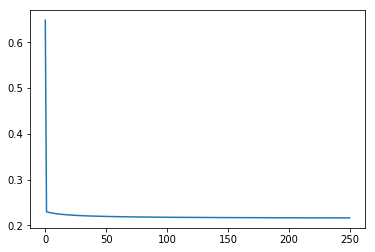

[0.21612205034846868, 0.2161176390485189, 0.21611326004665077, 0.2161089129880579, 0.21610459752312686]


In [113]:
#Apply Boosting/ Forward statge- wise tranning
from autograd import grad 
from autograd import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import csv


datapath = '/home/jingyan/Documents/eecs475/final_project/datasets/'
csvfile = datapath + 'header.csv'
fields = []
with open(csvfile) as file:
    reader = csv.reader(file,delimiter=',')
    for row in reader:
        fields.append(row)


csvname =datapath + 'dermatology.data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# # get input/output pairs

x = (data[:,:-1]).T

y = data[:,-1]
y =np.reshape(y,(1,len(y)))-1


#boosting initial model
def boostmodel0(x,w):
    a=w
    return a
#boosting first round model
def boostmodel1(x,w):
    a=np.array([ws0]*y.size)+x*w
    return a

def boostmodel2(x,w):
    a=np.array([ws0]*y.size)+x[sig1]*ws1+x*w
    return a

def boostmodel3(x,w):
    a=np.array([ws0]*y.size)+x[sig1]*ws1+x[sig2]*ws2+x*w
    return a

def boostmodel4(x,w):
    a=np.array([ws0]*y.size)+x[sig1]*ws1+x[sig2]*ws2+x[sig3]*ws3+x*w
    return a

def softmax (w,x,model):
    
    cost = np.sum(np.log (1 + np.exp(-y*model(x,w))))
    return cost/float (np.size(y))

def gradient_descent(g,alpha,max_its,w,model,i):
    # compute gradient module using autograd
    gradient = grad(g)
    ww = w[i]
    xx=x[i-1]
#     if i > 0:
#         x = [xx[i-1]]
    
    # run the gradient descent loop
    weight_history = [ww] # weight history container
    cost_history = [g(ww,xx,model)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(ww,xx,model)

        # take gradient descent step
        ww = ww - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(ww)
        cost_history.append(g(ww,xx,model))
    return weight_history,cost_history

w=np.random.randn(x.shape[0]+1,1)**2

boostresult0=gradient_descent(softmax,3,250,w,boostmodel0,0)
#Assign tuned w0
ws0=boostresult0[0][-1][0]
plt.plot(boostresult0[-1])
plt.show()
print(boostresult0[-1][-5:])

In [114]:
#Create list for second round boosting cost history and stroe weight
boostcost1=[]
boostweight1=[]
for k in range(1,x.shape[0]+1):
    boostresult1temp=gradient_descent(softmax,0.01,100,w,boostmodel1,k)
    boostcost1=np.append(boostcost1,boostresult1temp[-1][-1])
    boostweight1=np.append(boostweight1,boostresult1temp[0][-1]) 

print(boostcost1)    
sig1=np.argmin(boostcost1)

print(sig1)
ws1=boostweight1[sig1]

print('The first important attribute is',fields[0][sig1])

[0.2150525  0.21514872 0.2156726  0.21609912 0.21610423 0.21609512
 0.21610454 0.21609562 0.21603532 0.21603115 0.2160857  0.21609809
 0.21609883 0.21583241 0.21610432 0.2149636  0.21518536 0.21608264
 0.2153894  0.2161046  0.21609221 0.2161005  0.21603712 0.21610457
 0.21609497 0.21610451 0.21609895 0.21548587 0.21609493 0.21608649
 0.21608742 0.21544059 0.21608347 0.21491435]
33
The first important attribute is Age


In [115]:
#Create list for second round boosting cost history and stroe weight
boostcost2=[]
boostweight2=[]
for k in range(1,x.shape[0]+1):
    boostresult2temp=gradient_descent(softmax,0.1,50,w,boostmodel2,k)
    boostcost2=np.append(boostcost2,boostresult2temp[-1][-1])
    boostweight2=np.append(boostweight2,boostresult2temp[0][-1]) 
print(boostcost2)    
sig2=np.argmin(boostcost2)
if sig2 == sig1:
    sig2=np.argsort(boostcost2)[1]
print(sig2)
ws2=boostweight2[sig2]

print('The second important attribute is',fields[0][sig2])

[0.21491688 0.21494602 0.21501726 0.21507448 0.21610421 0.21609512
 0.21610454 0.21609562 0.21603532 0.21603115 0.2160857  0.21609809
 0.21609765 0.21503799 0.21610432 0.21491447 0.21491933 0.21507211
 0.21538939 0.2161046  0.21609208 0.2161005  0.21493488 0.21610457
 0.21609497 0.21610451 0.21609895 0.21492479 0.21609493 0.21608649
 0.21608742 0.21498572 0.21608347 0.21491435]
15
The second important attribute is exocytosis


In [119]:
#Create list for second round boosting cost history and stroe weight
boostcost3=[]
boostweight3=[]
for k in range(1,x.shape[0]+1):
    boostresult3temp=gradient_descent(softmax,0.1,50,w,boostmodel3,k)
    boostcost3=np.append(boostcost3,boostresult3temp[-1][-1])
    boostweight3=np.append(boostweight3,boostresult3temp[0][-1]) 
print(boostcost3)    
sig3=np.argmin(boostcost3)
if sig3==sig1:
    sig3=np.argsort(boostcost3)[1]
if sig3==sig2:
    sig3=np.argsort(boostcost3)[2]
print(sig3)
ws3=boostweight3[sig3]


print('The third important attribute is',fields[0][sig3])

[0.2149147  0.21491872 0.21501726 0.21493646 0.21491745 0.21609512
 0.21610454 0.21609562 0.21603532 0.21603115 0.2160857  0.21609809
 0.21609765 0.21503799 0.21610432 0.21491437 0.21491504 0.21507211
 0.21497979 0.2161046  0.21609208 0.2161005  0.21493488 0.21610457
 0.21609497 0.21610451 0.21609895 0.21491455 0.21609493 0.21608649
 0.21608742 0.21491571 0.21608347 0.21491435]
27
The third important attribute is spongiosis


In [123]:
#Create list for second round boosting cost history and stroe weight
boostcost4=[]
boostweight4=[]
for k in range(1,x.shape[0]+1):
    boostresult4temp=gradient_descent(softmax,0.1,50,w,boostmodel4,k)
    boostcost4=np.append(boostcost4,boostresult4temp[-1][-1])
    boostweight4=np.append(boostweight4,boostresult4temp[0][-1]) 
print(boostcost4)    
sig4=np.argmin(boostcost4)
if sig4==sig1:
    sig4=np.argsort(boostcost4)[1]
if sig4==sig2:
    sig4=np.argsort(boostcost4)[2]
if sig4==sig3:
    sig4=np.argsort(boostcost4)[3]
print(sig4)
ws4=boostweight4[sig4]


print('The forth important attribute is',fields[0][sig4])

[0.2149146  0.21491652 0.21496541 0.21492208 0.21491745 0.21609512
 0.21610454 0.21609562 0.21603532 0.21603115 0.2160857  0.21609809
 0.21609765 0.21503799 0.21575136 0.21491436 0.21491469 0.21502545
 0.21496044 0.2161046  0.21532461 0.2161005  0.21493488 0.21610457
 0.21609497 0.21610451 0.21609895 0.21491449 0.21609493 0.21608649
 0.21608742 0.21491482 0.21608347 0.21491435]
0
The forth important attribute is erythema
